In [2]:
import pandas as pd
import keras
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print ("libs loaded ...")

Using TensorFlow backend.


libs loaded ...


In [25]:
train = pd.read_csv('~/deepak/competitions/kaggle/grocery/data/train_random.csv',  parse_dates=['date'])

#train['day'] = train['date'].dt.day
#train['month'] = train['date'].dt.month
#train['dayofweek'] = train['date'].dt.dayofweek

unique_str = train['store_nbr'].unique()
unique_item = train['item_nbr'].unique()
print ("UNiQUE store no and item no count: ",len(unique_str), len(unique_item))

UNiQUE store no and item no count:  54 3299


In [26]:
"""
Sin and Cosine transform of dates: Cyclic transform
"""
train['sin_month'] = np.sin(2*np.pi*train['date'].dt.month/12)
train['sin_day'] = np.sin(2*np.pi*train['date'].dt.day/31)
train['sin_dayofweek'] = np.sin(2*np.pi*train['date'].dt.dayofweek/7)
    
train['cos_month'] = np.cos(2*np.pi*train['date'].dt.month/12)
train['cos_day'] = np.cos(2*np.pi*train['date'].dt.day/31)
train['cos_dayofweek'] = np.cos(2*np.pi*train['date'].dt.dayofweek/7)

print (train.shape,'\n')#, train.head(), '\n')#, train.keys())


(11000, 12) 



In [42]:
print (train.head())

         id       date  store_nbr  item_nbr  unit_sales onpromotion  \
7191  41701 2013-01-02         54    172184         1.0         NaN   
909   34232 2013-01-02         45    716245         2.0         NaN   
5404  25904 2013-01-02         34    268662         5.0         NaN   
9381  72646 2013-01-03         43   1036320         2.0         NaN   
8705  74918 2013-01-03         45    949296         9.0         NaN   

      sin_month   sin_day  sin_dayofweek  cos_month   cos_day  cos_dayofweek  
7191        0.5  0.394356       0.974928   0.866025  0.918958      -0.222521  
909         0.5  0.394356       0.974928   0.866025  0.918958      -0.222521  
5404        0.5  0.394356       0.974928   0.866025  0.918958      -0.222521  
9381        0.5  0.571268       0.433884   0.866025  0.820763      -0.900969  
8705        0.5  0.571268       0.433884   0.866025  0.820763      -0.900969  


10547


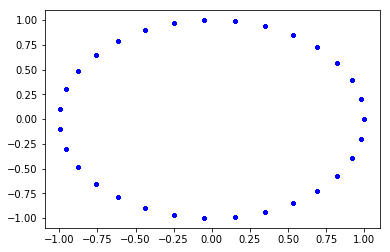

In [41]:
train = train.sort_values(by = 'date')
ti = train.groupby(['store_nbr', 'item_nbr'])
print (len(ti))
# # print (train.head(20))
# # plt.plot(train['unit_sales'], 'r.')
# plt.plot(train['cos_day'], train['sin_day'], 'b.')
# plt.show()